In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
df= pd.read_csv('data/cleaned-complaints.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565874 entries, 0 to 565873
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   complaint_id                  565874 non-null  int64 
 1   submitted_via                 565874 non-null  object
 2   date_received                 565874 non-null  object
 3   date_sent_to_company          565874 non-null  object
 4   timely_response               565874 non-null  object
 5   year                          565874 non-null  int64 
 6   product                       565874 non-null  object
 7   sub_product                   378745 non-null  object
 8   issue                         565874 non-null  object
 9   sub_issue                     233262 non-null  object
 10  company                       565874 non-null  object
 11  state                         565874 non-null  object
 12  consumer_consent_provided     214561 non-null  object
 13 

In [3]:
df.columns

Index(['complaint_id', 'submitted_via', 'date_received',
       'date_sent_to_company', 'timely_response', 'year', 'product',
       'sub_product', 'issue', 'sub_issue', 'company', 'state',
       'consumer_consent_provided', 'company_response_to_consumer',
       'consumer_disputed'],
      dtype='object')

In [4]:
df['date_received']= df['date_received'].astype('datetime64[ns]')
df['date_sent_to_company']= df['date_sent_to_company'].astype('datetime64[ns]')

df['product']= df['product'].astype('category')
df['sub_product']= df['sub_product'].astype('category')
df['issue']= df['issue'].astype('category')
df['sub_issue']= df['sub_issue'].astype('category')
df['company']= df['company'].astype('category')
df['state']= df['state'].astype('category')

df['submitted_via']= df['submitted_via'].astype('category')
df['timely_response']= df['timely_response'].astype('category')
df['consumer_consent_provided']= df['consumer_consent_provided'].astype('category')
df['company_response_to_consumer']= df['company_response_to_consumer'].astype('category')
df['consumer_disputed']= df['consumer_disputed'].astype('category')
df['date_sent_to_company']= df['date_sent_to_company'].astype('datetime64[ns]')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565874 entries, 0 to 565873
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   complaint_id                  565874 non-null  int64         
 1   submitted_via                 565874 non-null  category      
 2   date_received                 565874 non-null  datetime64[ns]
 3   date_sent_to_company          565874 non-null  datetime64[ns]
 4   timely_response               565874 non-null  category      
 5   year                          565874 non-null  int64         
 6   product                       565874 non-null  category      
 7   sub_product                   378745 non-null  category      
 8   issue                         565874 non-null  category      
 9   sub_issue                     233262 non-null  category      
 10  company                       565874 non-null  category      
 11  state        

# Label Encoding

In [5]:
df.isna().sum()

complaint_id                         0
submitted_via                        0
date_received                        0
date_sent_to_company                 0
timely_response                      0
year                                 0
product                              0
sub_product                     187129
issue                                0
sub_issue                       332612
company                              0
state                                0
consumer_consent_provided       351313
company_response_to_consumer         0
consumer_disputed                    0
dtype: int64

In [6]:
for i in df.columns:
    print(df[i].value_counts())

1623836    1
2001105    1
996583     1
1281104    1
2155405    1
          ..
1561515    1
226065     1
2108064    1
1189967    1
2009169    1
Name: complaint_id, Length: 565874, dtype: int64
Web            389628
Referral        91990
Postal mail     37930
Phone           37838
Fax              8341
Email             147
Name: submitted_via, dtype: int64
2015-08-27    887
2015-08-26    855
2014-06-26    853
2016-07-06    834
2016-09-20    825
             ... 
2013-10-13     46
2013-05-19     41
2014-07-13     41
2013-02-23     32
2014-03-09      4
Name: date_received, Length: 1461, dtype: int64
2015-11-13    1049
2016-09-20     928
2014-01-13     847
2014-03-12     839
2016-12-13     836
              ... 
2017-04-02       1
2017-04-04       1
2017-03-31       1
2017-03-13       1
2017-03-22       1
Name: date_sent_to_company, Length: 1541, dtype: int64
Yes    557930
No       7944
Name: timely_response, dtype: int64
2016    171841
2015    151646
2014    139647
2013    102740
Name: ye

In [7]:
df.columns

Index(['complaint_id', 'submitted_via', 'date_received',
       'date_sent_to_company', 'timely_response', 'year', 'product',
       'sub_product', 'issue', 'sub_issue', 'company', 'state',
       'consumer_consent_provided', 'company_response_to_consumer',
       'consumer_disputed'],
      dtype='object')

In [8]:
i='a'
i+'_le'

'a_le'

In [9]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder object
le = LabelEncoder()

mask_lef= ['sub_product', 'sub_issue', 'consumer_consent_provided']
lef= ['product', 'issue', 'company_response_to_consumer', 'consumer_disputed', 'state', 'timely_response', 'submitted_via']

# Label encode the columns
for i in lef:
    df[i+'_le']= le.fit_transform(df[i].astype(str))

df.head()

In [10]:
df.head()

,complaint_id,submitted_via,date_received,date_sent_to_company,timely_response,year,product,sub_product,issue,sub_issue,...,consumer_consent_provided,company_response_to_consumer,consumer_disputed,product_le,issue_le,company_response_to_consumer_le,consumer_disputed_le,state_le,timely_response_le,submitted_via_le
0,1623836,Web,2015-10-26,2015-10-28,Yes,2015,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,...,Consent provided,Closed,Yes,4,25,0,1,23,1,5
1,2004883,Web,2016-07-08,2016-07-08,Yes,2016,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,...,Consent not provided,Closed with explanation,No,0,63,1,0,33,1,5
2,1038897,Web,2014-09-22,2014-09-22,Yes,2014,Credit card,NaN,Other,NaN,...,NaN,Closed with explanation,No,2,68,1,0,29,1,5
3,353552,Web,2013-03-13,2013-03-18,Yes,2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,...,NaN,Closed with explanation,Yes,6,59,1,1,34,1,5
4,405371,Web,2013-05-13,2013-05-13,Yes,2013,Credit card,NaN,Late fee,NaN,...,NaN,Closed with monetary relief,No,2,54,2,0,33,1,5


In [11]:
for i in mask_lef:
    df[i+'_le']= le.fit_transform(df[i].astype(str))

In [12]:
df.isna().sum()

complaint_id                            0
submitted_via                           0
date_received                           0
date_sent_to_company                    0
timely_response                         0
year                                    0
product                                 0
sub_product                        187129
issue                                   0
sub_issue                          332612
company                                 0
state                                   0
consumer_consent_provided          351313
company_response_to_consumer            0
consumer_disputed                       0
product_le                              0
issue_le                                0
company_response_to_consumer_le         0
consumer_disputed_le                    0
state_le                                0
timely_response_le                      0
submitted_via_le                        0
sub_product_le                          0
sub_issue_le                      

In [14]:
df[(df['sub_issue'].isna())][['sub_issue', 'sub_issue_le']]

,sub_issue,sub_issue_le
1,NaN,58
2,NaN,58
3,NaN,58
4,NaN,58
5,NaN,58
...,...,...
565867,NaN,58
565868,NaN,58
565869,NaN,58
565872,NaN,58


In [15]:
df.isna().sum()

complaint_id                            0
submitted_via                           0
date_received                           0
date_sent_to_company                    0
timely_response                         0
year                                    0
product                                 0
sub_product                        187129
issue                                   0
sub_issue                          332612
company                                 0
state                                   0
consumer_consent_provided          351313
company_response_to_consumer            0
consumer_disputed                       0
product_le                              0
issue_le                                0
company_response_to_consumer_le         0
consumer_disputed_le                    0
state_le                                0
timely_response_le                      0
submitted_via_le                        0
sub_product_le                          0
sub_issue_le                      

In [16]:
for i in mask_lef:
    df.loc[df[i].isna(), i+'_le'] = np.nan

df.isna().sum()

complaint_id                            0
submitted_via                           0
date_received                           0
date_sent_to_company                    0
timely_response                         0
year                                    0
product                                 0
sub_product                        187129
issue                                   0
sub_issue                          332612
company                                 0
state                                   0
consumer_consent_provided          351313
company_response_to_consumer            0
consumer_disputed                       0
product_le                              0
issue_le                                0
company_response_to_consumer_le         0
consumer_disputed_le                    0
state_le                                0
timely_response_le                      0
submitted_via_le                        0
sub_product_le                     187129
sub_issue_le                      

# Count category encoding

In [17]:
import category_encoders as ce
# Create CountEncoder object
ce_count = ce.CountEncoder()

# Perform count encoding on 'company' column
df['company_ce'] = ce_count.fit_transform(df['company'])

df[['company', 'company_ce']]

c:\Users\31405.ISBDOMAIN1\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


,company,company_ce
0,Hillcrest Davidson & Associates,136
1,HSBC NORTH AMERICA HOLDINGS INC.,5519
2,CAPITAL ONE FINANCIAL CORPORATION,14386
3,"HUNTINGTON NATIONAL BANK, THE",1049
4,AMERICAN EXPRESS COMPANY,6424
...,...,...
565869,U.S. BANCORP,9743
565870,Experian Information Solutions Inc.,39764
565871,"EQUIFAX, INC.",42088
565872,PNC Bank N.A.,6554


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565874 entries, 0 to 565873
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   complaint_id                     565874 non-null  int64         
 1   submitted_via                    565874 non-null  category      
 2   date_received                    565874 non-null  datetime64[ns]
 3   date_sent_to_company             565874 non-null  datetime64[ns]
 4   timely_response                  565874 non-null  category      
 5   year                             565874 non-null  int64         
 6   product                          565874 non-null  category      
 7   sub_product                      378745 non-null  category      
 8   issue                            565874 non-null  category      
 9   sub_issue                        233262 non-null  category      
 10  company                          565874 non-

In [23]:
df['company_ce'].describe([0.20, 0.15, 0.10, 0.05, 0.03, 0.01])

count    565874.000000
mean      20348.784351
std       17300.946112
min          15.000000
1%          108.000000
3%          163.000000
5%          224.000000
10%         488.000000
15%         916.000000
20%        1424.000000
50%       14386.000000
max       45490.000000
Name: company_ce, dtype: float64

In [21]:
pd.DataFrame(df['company'].value_counts())

,company
"BANK OF AMERICA, NATIONAL ASSOCIATION",45490
"EQUIFAX, INC.",42088
WELLS FARGO & COMPANY,39959
Experian Information Solutions Inc.,39764
"TRANSUNION INTERMEDIATE HOLDINGS, INC.",34163
...,...
FIRST AMERICAN FINANCIAL CORPORATION,85
"Delray Capital, LLC",82
Global Recovery Group,71
FIRSTBANK PUERTO RICO,46


In [24]:
df= df[df['company_ce']>=90]
df.reset_index(inplace=True, drop=True)
df.shape

(565135, 26)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565135 entries, 0 to 565134
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   complaint_id                     565135 non-null  int64         
 1   submitted_via                    565135 non-null  category      
 2   date_received                    565135 non-null  datetime64[ns]
 3   date_sent_to_company             565135 non-null  datetime64[ns]
 4   timely_response                  565135 non-null  category      
 5   year                             565135 non-null  int64         
 6   product                          565135 non-null  category      
 7   sub_product                      378038 non-null  category      
 8   issue                            565135 non-null  category      
 9   sub_issue                        232935 non-null  category      
 10  company                          565135 non-

# Feature extraction

In [27]:
df['lag_submit_to_send']= df['date_sent_to_company'] - df['date_received']
df['lag_submit_to_send'].value_counts()

0 days      283410
1 days       58151
2 days       42508
3 days       32775
4 days       31949
             ...  
520 days         1
314 days         1
340 days         1
312 days         1
315 days         1
Name: lag_submit_to_send, Length: 399, dtype: int64

In [33]:
df['lag_submit_to_send']= df['lag_submit_to_send'].dt.days

In [34]:
df

,complaint_id,submitted_via,date_received,date_sent_to_company,timely_response,year,product,sub_product,issue,sub_issue,...,company_response_to_consumer_le,consumer_disputed_le,state_le,timely_response_le,submitted_via_le,sub_product_le,sub_issue_le,consumer_consent_provided_le,company_ce,lag_submit_to_send
0,1623836,Web,2015-10-26,2015-10-28,Yes,2015,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,...,0,1,23,1,5,20.0,20.0,1.0,136,2
1,2004883,Web,2016-07-08,2016-07-08,Yes,2016,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,...,1,0,33,1,5,30.0,NaN,0.0,5519,0
2,1038897,Web,2014-09-22,2014-09-22,Yes,2014,Credit card,NaN,Other,NaN,...,1,0,29,1,5,NaN,NaN,NaN,14386,0
3,353552,Web,2013-03-13,2013-03-18,Yes,2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,...,1,1,34,1,5,31.0,NaN,NaN,1049,5
4,405371,Web,2013-05-13,2013-05-13,Yes,2013,Credit card,NaN,Late fee,NaN,...,2,0,33,1,5,NaN,NaN,NaN,6424,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565130,740648,Web,2014-03-03,2014-03-03,Yes,2014,Credit card,NaN,Payoff process,NaN,...,3,0,4,1,5,NaN,NaN,NaN,9743,0
565131,657754,Postal mail,2014-01-07,2014-01-27,Yes,2014,Credit reporting,NaN,Incorrect information on credit report,Account status,...,1,0,42,1,3,NaN,0.0,NaN,39764,20
565132,1887015,Web,2016-04-19,2016-04-19,Yes,2016,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,...,1,0,4,1,5,NaN,26.0,3.0,42088,0
565133,2018364,Web,2016-07-19,2016-07-19,Yes,2016,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,...,0,0,42,1,5,6.0,NaN,1.0,6554,0


In [35]:
df['lag_submit_to_send'].describe()

count    565135.000000
mean          3.823012
std          15.821537
min          -1.000000
25%           0.000000
50%           0.000000
75%           4.000000
max        1613.000000
Name: lag_submit_to_send, dtype: float64

In [36]:
df.shape

(565135, 27)

In [37]:
df= df[df['lag_submit_to_send']>=0]
df.shape

(558723, 27)

In [38]:
df['lag_submit_to_send'].describe()

count    558723.000000
mean          3.878362
std          15.903577
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max        1613.000000
Name: lag_submit_to_send, dtype: float64

In [39]:
df['lag_submit_to_send'].value_counts()

0       283410
1        58151
2        42508
3        32775
4        31949
         ...  
588          1
783          1
334          1
1613         1
315          1
Name: lag_submit_to_send, Length: 398, dtype: int64

# seasonal fe

In [48]:
df['month']= df['date_received'].dt.month
df['week']= df['date_received'].dt.week
df['day']= df['date_received'].dt.day_of_week

C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\12\ipykernel_20704\951655708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']= df['date_received'].dt.month
C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\12\ipykernel_20704\951655708.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week']= df['date_received'].dt.week
C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\12\ipykernel_20704\951655708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [47]:
df['date_received'].dt.da.describe()

count    558723.000000
mean          2.347693
std           1.670552
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max           6.000000
Name: date_received, dtype: float64

In [49]:
df

,complaint_id,submitted_via,date_received,date_sent_to_company,timely_response,year,product,sub_product,issue,sub_issue,...,submitted_via_le,sub_product_le,sub_issue_le,consumer_consent_provided_le,company_ce,lag_submit_to_send,lag_submit_to_send_mms,month,week,day
0,1623836,Web,2015-10-26,2015-10-28,Yes,2015,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,...,5,20.0,20.0,1.0,0.001013,2,0.001240,10,44,0
1,2004883,Web,2016-07-08,2016-07-08,Yes,2016,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,...,5,30.0,NaN,0.0,0.119581,0,0.000000,7,27,4
2,1038897,Web,2014-09-22,2014-09-22,Yes,2014,Credit card,NaN,Other,NaN,...,5,NaN,NaN,NaN,0.314890,0,0.000000,9,39,0
3,353552,Web,2013-03-13,2013-03-18,Yes,2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,...,5,31.0,NaN,NaN,0.021123,5,0.003100,3,11,2
4,405371,Web,2013-05-13,2013-05-13,Yes,2013,Credit card,NaN,Late fee,NaN,...,5,NaN,NaN,NaN,0.139515,0,0.000000,5,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565130,740648,Web,2014-03-03,2014-03-03,Yes,2014,Credit card,NaN,Payoff process,NaN,...,5,NaN,NaN,NaN,0.212621,0,0.000000,3,10,0
565131,657754,Postal mail,2014-01-07,2014-01-27,Yes,2014,Credit reporting,NaN,Incorrect information on credit report,Account status,...,3,NaN,0.0,NaN,0.873877,20,0.012399,1,2,1
565132,1887015,Web,2016-04-19,2016-04-19,Yes,2016,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,...,5,NaN,26.0,3.0,0.925066,0,0.000000,4,16,1
565133,2018364,Web,2016-07-19,2016-07-19,Yes,2016,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,...,5,6.0,NaN,1.0,0.142379,0,0.000000,7,29,1


# Scale, transform

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['lag_submit_to_send_mms']  = scaler.fit_transform(df[['lag_submit_to_send']])
df['lag_submit_to_send_mms'].describe()


C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\12\ipykernel_20704\1485514606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_submit_to_send_mms']  = scaler.fit_transform(df[['lag_submit_to_send']])


count    558723.000000
mean          0.002404
std           0.009860
min           0.000000
25%           0.000000
50%           0.000000
75%           0.002480
max           1.000000
Name: lag_submit_to_send_mms, dtype: float64

In [41]:
df['company_ce'].describe()

count    558723.000000
mean      20363.833112
std       17301.387502
min          90.000000
25%        2509.000000
50%       14386.000000
75%       39764.000000
max       45490.000000
Name: company_ce, dtype: float64

In [42]:
df['company_ce']  = scaler.fit_transform(df[['company_ce']])
df['company_ce'].describe()

C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\12\ipykernel_20704\3434185719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_ce']  = scaler.fit_transform(df[['company_ce']])


count    558723.000000
mean          0.446560
std           0.381088
min           0.000000
25%           0.053282
50%           0.314890
75%           0.873877
max           1.000000
Name: company_ce, dtype: float64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558723 entries, 0 to 565134
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   complaint_id                     558723 non-null  int64         
 1   submitted_via                    558723 non-null  category      
 2   date_received                    558723 non-null  datetime64[ns]
 3   date_sent_to_company             558723 non-null  datetime64[ns]
 4   timely_response                  558723 non-null  category      
 5   year                             558723 non-null  int64         
 6   product                          558723 non-null  category      
 7   sub_product                      374308 non-null  category      
 8   issue                            558723 non-null  category      
 9   sub_issue                        229740 non-null  category      
 10  company                          558723 non-

In [50]:
df.columns

Index(['complaint_id', 'submitted_via', 'date_received',
       'date_sent_to_company', 'timely_response', 'year', 'product',
       'sub_product', 'issue', 'sub_issue', 'company', 'state',
       'consumer_consent_provided', 'company_response_to_consumer',
       'consumer_disputed', 'product_le', 'issue_le',
       'company_response_to_consumer_le', 'consumer_disputed_le', 'state_le',
       'timely_response_le', 'submitted_via_le', 'sub_product_le',
       'sub_issue_le', 'consumer_consent_provided_le', 'company_ce',
       'lag_submit_to_send', 'lag_submit_to_send_mms', 'month', 'week', 'day'],
      dtype='object')

In [52]:
df[['company_response_to_consumer',
       'consumer_disputed']].value_counts().sort_index()

company_response_to_consumer     consumer_disputed
Closed                           No                     8388
                                 Yes                    2316
Closed with explanation          No                   341154
                                 Yes                   94478
Closed with monetary relief      No                    33647
                                 Yes                    4101
Closed with non-monetary relief  No                    66100
                                 Yes                    8539
dtype: int64

In [53]:
df= df[['complaint_id', 'submitted_via', 'date_received', 'date_sent_to_company', 'timely_response', 'lag_submit_to_send',
        'year', 'month', 'week', 'day',
       'product', 'sub_product', 'issue', 'sub_issue', 'company', 'state',
       'consumer_consent_provided', 'company_response_to_consumer', 'consumer_disputed', 

       'submitted_via_le', 'timely_response_le', 'lag_submit_to_send_mms',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 
       'company_ce', 'state_le', 
       'company_response_to_consumer_le', 'consumer_consent_provided_le', 'consumer_disputed_le', 
        ]]

df

,complaint_id,submitted_via,date_received,date_sent_to_company,timely_response,lag_submit_to_send,year,month,week,day,...,lag_submit_to_send_mms,product_le,sub_product_le,issue_le,sub_issue_le,company_ce,state_le,company_response_to_consumer_le,consumer_consent_provided_le,consumer_disputed_le
0,1623836,Web,2015-10-26,2015-10-28,Yes,2,2015,10,44,0,...,0.001240,4,20.0,25,20.0,0.001013,23,0,1.0,1
1,2004883,Web,2016-07-08,2016-07-08,Yes,0,2016,7,27,4,...,0.000000,0,30.0,63,NaN,0.119581,33,1,0.0,0
2,1038897,Web,2014-09-22,2014-09-22,Yes,0,2014,9,39,0,...,0.000000,2,NaN,68,NaN,0.314890,29,1,NaN,0
3,353552,Web,2013-03-13,2013-03-18,Yes,5,2013,3,11,2,...,0.003100,6,31.0,59,NaN,0.021123,34,1,NaN,1
4,405371,Web,2013-05-13,2013-05-13,Yes,0,2013,5,20,0,...,0.000000,2,NaN,54,NaN,0.139515,33,2,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565130,740648,Web,2014-03-03,2014-03-03,Yes,0,2014,3,10,0,...,0.000000,2,NaN,75,NaN,0.212621,4,3,NaN,0
565131,657754,Postal mail,2014-01-07,2014-01-27,Yes,20,2014,1,2,1,...,0.012399,3,NaN,52,0.0,0.873877,42,1,NaN,0
565132,1887015,Web,2016-04-19,2016-04-19,Yes,0,2016,4,16,1,...,0.000000,3,NaN,52,26.0,0.925066,4,1,3.0,0
565133,2018364,Web,2016-07-19,2016-07-19,Yes,0,2016,7,29,1,...,0.000000,6,6.0,59,NaN,0.142379,42,0,1.0,0


In [56]:
dfm= df[['submitted_via_le', 'timely_response_le', 'lag_submit_to_send_mms', 
       'year', 'month', 'week', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 
       'consumer_consent_provided_le', 'company_response_to_consumer_le']]

dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558723 entries, 0 to 565134
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   submitted_via_le                 558723 non-null  int32  
 1   timely_response_le               558723 non-null  int32  
 2   lag_submit_to_send_mms           558723 non-null  float64
 3   year                             558723 non-null  int64  
 4   month                            558723 non-null  int64  
 5   week                             558723 non-null  int64  
 6   day                              558723 non-null  int64  
 7   product_le                       558723 non-null  int32  
 8   sub_product_le                   374308 non-null  float64
 9   issue_le                         558723 non-null  int32  
 10  sub_issue_le                     229740 non-null  float64
 11  company_ce                       558723 non-null  float64
 12  st

In [57]:
dfm.isna().sum()

submitted_via_le                        0
timely_response_le                      0
lag_submit_to_send_mms                  0
year                                    0
month                                   0
week                                    0
day                                     0
product_le                              0
sub_product_le                     184415
issue_le                                0
sub_issue_le                       328983
company_ce                              0
state_le                                0
consumer_consent_provided_le       344453
company_response_to_consumer_le         0
dtype: int64

In [58]:
dff= dfm.fillna(9999)
dff.isna().sum()

submitted_via_le                   0
timely_response_le                 0
lag_submit_to_send_mms             0
year                               0
month                              0
week                               0
day                                0
product_le                         0
sub_product_le                     0
issue_le                           0
sub_issue_le                       0
company_ce                         0
state_le                           0
consumer_consent_provided_le       0
company_response_to_consumer_le    0
dtype: int64

# Feature Selection

In [92]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load data and split into training and testing sets
X = dff[['submitted_via_le', 'timely_response_le', 'lag_submit_to_send_mms', 
       'year', 'month', 'week', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 
       'consumer_consent_provided_le']]
y = dff['company_response_to_consumer_le']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Get the coefficients of the model
coef = pd.Series(lasso.coef_, index=X.columns)

# Print the selected features
selected_features = coef[coef!=0].index.tolist()
print("Selected Features:", selected_features)

Selected Features: ['sub_product_le']


In [93]:
coef

submitted_via_le                0.000000
timely_response_le              0.000000
lag_submit_to_send_mms         -0.000000
year                           -0.000000
month                          -0.000000
week                           -0.000000
day                             0.000000
product_le                     -0.000000
sub_product_le                 -0.003969
issue_le                       -0.000000
sub_issue_le                    0.000000
company_ce                      0.000000
state_le                        0.000000
consumer_consent_provided_le   -0.000000
dtype: float64

In [94]:
import statsmodels.api as sm


# Load data and split into training and testing sets
X = dfm[['submitted_via_le', 'timely_response_le', 'lag_submit_to_send_mms', 
       'year', 'month', 'week', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 
       'consumer_consent_provided_le']].fillna(-1)
y = dff['company_response_to_consumer_le']
# Add an intercept term to the independent variables
X = sm.add_constant(X)

# Fit the OLS model to the data
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

# Use the F-test to select significant features
pvalues = model.f_pvalue
significant_features = [feature for feature, pvalue in zip(X.columns, pvalues) if pvalue < 0.05]

# Print the selected features
print(significant_features)

                                   OLS Regression Results                                  
Dep. Variable:     company_response_to_consumer_le   R-squared:                       0.048
Model:                                         OLS   Adj. R-squared:                  0.048
Method:                              Least Squares   F-statistic:                     2014.
Date:                             Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                                     07:55:44   Log-Likelihood:            -5.9715e+05
No. Observations:                           558723   AIC:                         1.194e+06
Df Residuals:                               558708   BIC:                         1.195e+06
Df Model:                                       14                                         
Covariance Type:                         nonrobust                                         
                                   coef    std err          t      P>|t|      [0

TypeError: 'numpy.float64' object is not iterable

In [83]:
 #Split the data into features and target
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
import pandas as pd
X = dfm[['submitted_via_le', 'timely_response_le', 'lag_submit_to_send_mms', 
       'year', 'month', 'week', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 
       'consumer_consent_provided_le']].fillna(-1)
y = dff['company_response_to_consumer_le']
# Create a random forest classifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=1)


# Use the random forest classifier for feature selection
selector = SelectFromModel(rfc)
selector.fit(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support()]

print(selected_features)

Index(['lag_submit_to_send_mms', 'month', 'week', 'day', 'company_ce',
       'state_le'],
      dtype='object')


# PCA

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

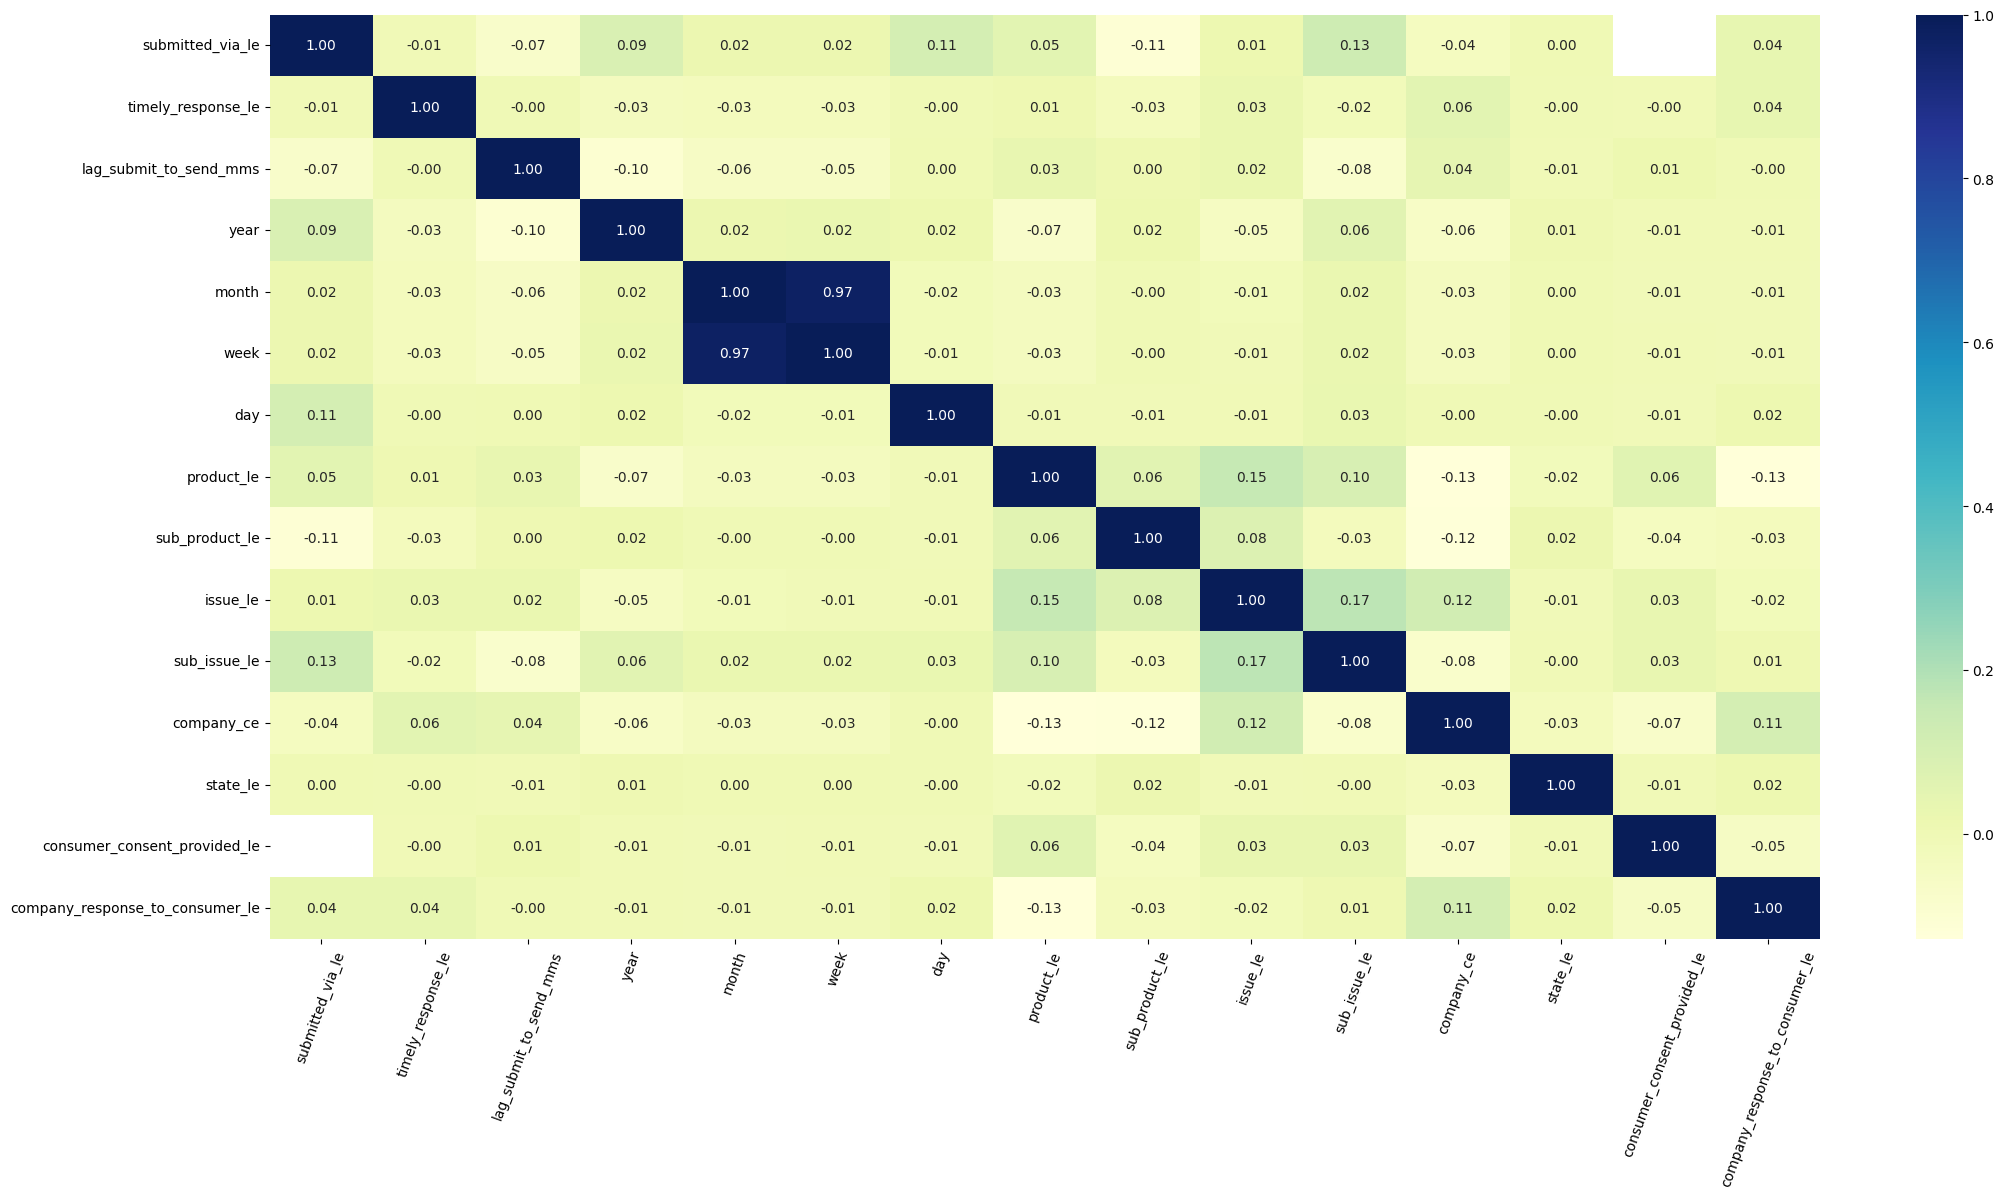

In [67]:
fig, ax = plt.subplots(figsize=(25,12))

hm= sns.heatmap(dfm.corr(), cmap="YlGnBu", annot=True, fmt='.2f')
hm.set_xticklabels(hm.get_xticklabels(), rotation=70)
plt.show()

In [70]:
dff

,submitted_via_le,timely_response_le,lag_submit_to_send_mms,year,month,week,day,product_le,sub_product_le,issue_le,sub_issue_le,company_ce,state_le,consumer_consent_provided_le,company_response_to_consumer_le
0,5,1,0.001240,2015,10,44,0,4,20.0,25,20.0,0.001013,23,1.0,0
1,5,1,0.000000,2016,7,27,4,0,30.0,63,9999.0,0.119581,33,0.0,1
2,5,1,0.000000,2014,9,39,0,2,9999.0,68,9999.0,0.314890,29,9999.0,1
3,5,1,0.003100,2013,3,11,2,6,31.0,59,9999.0,0.021123,34,9999.0,1
4,5,1,0.000000,2013,5,20,0,2,9999.0,54,9999.0,0.139515,33,9999.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565130,5,1,0.000000,2014,3,10,0,2,9999.0,75,9999.0,0.212621,4,9999.0,3
565131,3,1,0.012399,2014,1,2,1,3,9999.0,52,0.0,0.873877,42,9999.0,1
565132,5,1,0.000000,2016,4,16,1,3,9999.0,52,26.0,0.925066,4,3.0,1
565133,5,1,0.000000,2016,7,29,1,6,6.0,59,9999.0,0.142379,42,1.0,0


In [84]:
dfm.isna().sum()

submitted_via_le                        0
timely_response_le                      0
lag_submit_to_send_mms                  0
year                                    0
month                                   0
week                                    0
day                                     0
product_le                              0
sub_product_le                     184415
issue_le                                0
sub_issue_le                       328983
company_ce                              0
state_le                                0
consumer_consent_provided_le       344453
company_response_to_consumer_le         0
dtype: int64

In [85]:
dff= dfm.fillna(-1)

In [ ]:
X = dfm[['submitted_via_le', 'timely_response_le', 'lag_submit_to_send_mms', 
       'year', 'month', 'week', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 
       'consumer_consent_provided_le']].fillna(-1)
y = dff['company_response_to_consumer_le']

In [88]:
from sklearn.decomposition import PCA

# Initialize PCA object
pca = PCA()

# Fit and transform the correlation matrix
pca.fit(dfm[['submitted_via_le', 'timely_response_le', 'lag_submit_to_send_mms', 
       'year', 'month', 'week', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 
       'consumer_consent_provided_le']].fillna(-1).corr())

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each component
print(explained_variance_ratio.round(3))

[0.234 0.189 0.141 0.074 0.067 0.062 0.06  0.058 0.049 0.032 0.027 0.007
 0.    0.   ]


In [107]:
numbers = [0.234, 0.189, 0.141, 0.074, 0.067, 0.062, 0.06, 0.058, 0.049, 0.032, 0.027, 0.007, 0.0, 0.0]
sum(numbers[:10])

0.9660000000000003

In [98]:
len(['submitted_via_le', 'timely_response_le', 'lag_submit_to_send_mms', 
       'year', 'month', 'week', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 
       'consumer_consent_provided_le'])

14

In [108]:
# Initialize PCA object with 2 components
pca = PCA(n_components=10)

In [109]:
reduced_data= pca.fit_transform(dff[['submitted_via_le', 'timely_response_le', 'lag_submit_to_send_mms', 
       'year', 'month', 'week', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 
       'consumer_consent_provided_le']])
reduced_data

array([[-2.25782612e+01,  1.13522255e+01, -1.45464322e+01, ...,
         1.26389609e+00, -6.59316202e-01,  4.05317260e-01],
       [ 1.74570013e+01, -1.03267986e+01, -3.35956445e+00, ...,
         1.37948051e+00, -8.76836361e-02, -3.98851845e-01],
       [ 2.05100334e+01,  2.46427708e+00, -1.19538304e+01, ...,
        -4.60393473e-01, -9.44928653e-01,  3.08796024e-01],
       ...,
       [ 3.48141644e+00,  1.32269965e+01,  1.42849596e+01, ...,
         3.00860614e+00, -1.69231301e-01,  1.21310601e-01],
       [ 1.20097195e+01, -1.40509540e+00, -1.45787996e+00, ...,
         2.18492830e+00,  9.11339080e-02,  1.92878921e-02],
       [-4.57640739e+01, -7.90527407e+00, -2.07193219e+00, ...,
         2.04756494e+00, -2.87580160e-01, -1.64597082e-01]])

In [115]:
cols=[]
for i in range(1, 11):
    cols.append('PCA_'+str(i))

In [116]:
df_reduced = pd.DataFrame(reduced_data, columns=cols)
df_reduced

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,-22.578261,11.352225,-14.546432,0.906280,11.257206,0.181435,-2.181742,1.263896,-0.659316,0.405317
1,17.457001,-10.326799,-3.359564,14.104011,12.605561,-4.738062,1.868380,1.379481,-0.087684,-0.398852
2,20.510033,2.464277,-11.953830,8.879750,-16.840995,-1.320883,-2.318349,-0.460393,-0.944929,0.308796
3,13.955230,-16.041678,12.241388,13.974188,14.178959,1.325453,-0.271621,-0.997819,-1.342618,0.062504
4,6.896056,-4.212775,6.808929,11.416629,-16.129537,-1.139180,-2.381604,-1.078845,-1.492386,0.091224
...,...,...,...,...,...,...,...,...,...,...
558718,28.457467,-10.404317,12.900493,-17.653675,-16.563286,-1.640886,-2.360764,-0.281544,-0.986651,-0.167910
558719,5.063557,-7.759067,25.695467,18.702507,-15.455093,-0.315345,-1.581950,-1.081020,0.835410,0.021847
558720,3.481416,13.226997,14.284960,-22.335820,-7.008768,-0.624569,-1.166778,3.008606,-0.169231,0.121311
558721,12.009720,-1.405095,-1.457880,21.335237,-9.676987,2.422171,-1.072589,2.184928,0.091134,0.019288


In [117]:
# Principal components correlation coefficients
loadings = pca.components_
loadings

array([[ 1.17061334e-04,  1.33082869e-04,  1.11442263e-05,
        -2.80291536e-03, -4.51464191e-03, -1.90517200e-02,
        -7.84931931e-04,  1.72462133e-02,  5.78678164e-02,
         9.95156851e-01, -7.32279379e-02,  1.80258828e-03,
        -1.60772939e-02, -9.00872959e-04],
       [ 9.35379730e-03, -4.24023812e-05, -2.23423833e-05,
         8.94219439e-03,  6.85293885e-02,  3.05092580e-01,
         3.63565335e-03, -3.82796218e-03, -2.98856004e-01,
         9.11690469e-02,  8.80599545e-01,  2.77886357e-03,
         1.69905263e-01,  8.31416198e-03],
       [ 1.86263313e-03,  2.07932523e-04,  2.83398023e-05,
         1.40323960e-03, -2.06346155e-01, -9.24062718e-01,
         3.07012533e-03,  2.42622592e-03, -1.09118441e-01,
         9.86909512e-03,  2.73075000e-01,  1.83114886e-03,
         1.30018736e-01, -5.11362303e-03],
       [-2.07465715e-03, -2.48308904e-05, -5.11929196e-06,
        -1.64833818e-03,  1.56771135e-02,  6.95195101e-02,
        -1.37835952e-03, -2.35057971e-03,  7.

In [119]:
# Number of features before PCA
n_features = pca.n_features_
n_features

14

In [121]:
# Feature names before PCA
feature_names = ['submitted_via_le', 'timely_response_le', 'lag_submit_to_send_mms', 
       'year', 'month', 'week', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 
       'consumer_consent_provided_le']
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
feature_names,,,,,,,,,,
submitted_via_le,0.000117,0.009354,0.001863,-0.002075,-0.003700,0.039688,0.104485,0.350186,-0.855737,0.014215
timely_response_le,0.000133,-0.000042,0.000208,-0.000025,-0.000590,0.001250,-0.000476,-0.002589,-0.000494,0.000501
lag_submit_to_send_mms,0.000011,-0.000022,0.000028,-0.000005,-0.000001,0.000135,-0.000031,-0.000862,0.000199,0.000173
year,-0.002803,0.008942,0.001403,-0.001648,0.000282,-0.039613,0.038635,0.722386,0.499740,-0.019367
month,-0.004515,0.068529,-0.206346,0.015677,-0.003143,-0.001156,-0.001579,-0.012904,-0.020889,-0.975612
week,-0.019052,0.305093,-0.924063,0.069520,-0.013995,0.004940,0.001563,-0.003176,0.005999,0.218033
day,-0.000785,0.003636,0.003070,-0.001378,-0.001150,-0.010057,0.991422,-0.105240,0.076606,-0.002250
product_le,0.017246,-0.003828,0.002426,-0.002351,0.044292,0.997159,0.006948,0.009563,0.055129,-0.003485
sub_product_le,0.057868,-0.298856,-0.109118,0.070439,0.942550,-0.043385,0.003377,0.005940,-0.006732,0.000071


In [122]:
df

,complaint_id,submitted_via,date_received,date_sent_to_company,timely_response,lag_submit_to_send,year,month,week,day,...,lag_submit_to_send_mms,product_le,sub_product_le,issue_le,sub_issue_le,company_ce,state_le,company_response_to_consumer_le,consumer_consent_provided_le,consumer_disputed_le
0,1623836,Web,2015-10-26,2015-10-28,Yes,2,2015,10,44,0,...,0.001240,4,20.0,25,20.0,0.001013,23,0,1.0,1
1,2004883,Web,2016-07-08,2016-07-08,Yes,0,2016,7,27,4,...,0.000000,0,30.0,63,NaN,0.119581,33,1,0.0,0
2,1038897,Web,2014-09-22,2014-09-22,Yes,0,2014,9,39,0,...,0.000000,2,NaN,68,NaN,0.314890,29,1,NaN,0
3,353552,Web,2013-03-13,2013-03-18,Yes,5,2013,3,11,2,...,0.003100,6,31.0,59,NaN,0.021123,34,1,NaN,1
4,405371,Web,2013-05-13,2013-05-13,Yes,0,2013,5,20,0,...,0.000000,2,NaN,54,NaN,0.139515,33,2,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565130,740648,Web,2014-03-03,2014-03-03,Yes,0,2014,3,10,0,...,0.000000,2,NaN,75,NaN,0.212621,4,3,NaN,0
565131,657754,Postal mail,2014-01-07,2014-01-27,Yes,20,2014,1,2,1,...,0.012399,3,NaN,52,0.0,0.873877,42,1,NaN,0
565132,1887015,Web,2016-04-19,2016-04-19,Yes,0,2016,4,16,1,...,0.000000,3,NaN,52,26.0,0.925066,4,1,3.0,0
565133,2018364,Web,2016-07-19,2016-07-19,Yes,0,2016,7,29,1,...,0.000000,6,6.0,59,NaN,0.142379,42,0,1.0,0


In [124]:
df_reduced

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,-22.578261,11.352225,-14.546432,0.906280,11.257206,0.181435,-2.181742,1.263896,-0.659316,0.405317
1,17.457001,-10.326799,-3.359564,14.104011,12.605561,-4.738062,1.868380,1.379481,-0.087684,-0.398852
2,20.510033,2.464277,-11.953830,8.879750,-16.840995,-1.320883,-2.318349,-0.460393,-0.944929,0.308796
3,13.955230,-16.041678,12.241388,13.974188,14.178959,1.325453,-0.271621,-0.997819,-1.342618,0.062504
4,6.896056,-4.212775,6.808929,11.416629,-16.129537,-1.139180,-2.381604,-1.078845,-1.492386,0.091224
...,...,...,...,...,...,...,...,...,...,...
558718,28.457467,-10.404317,12.900493,-17.653675,-16.563286,-1.640886,-2.360764,-0.281544,-0.986651,-0.167910
558719,5.063557,-7.759067,25.695467,18.702507,-15.455093,-0.315345,-1.581950,-1.081020,0.835410,0.021847
558720,3.481416,13.226997,14.284960,-22.335820,-7.008768,-0.624569,-1.166778,3.008606,-0.169231,0.121311
558721,12.009720,-1.405095,-1.457880,21.335237,-9.676987,2.422171,-1.072589,2.184928,0.091134,0.019288


In [126]:
pd.concat([df, df_reduced], axis=1).to_csv('data/transformed_complaints.csv', index=False)